In [2]:
import pandas as pd
import numpy as np
import sklearn.metrics as metrics
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV


In [3]:
training_data = pd.read_csv('/home/ec2-user/capstone/broadband-capstone/data/current_data/train_3.csv')
test_data = pd.read_csv('/home/ec2-user/capstone/broadband-capstone/data/current_data/test_3.csv')

### Modeling

In [4]:
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [5]:
poverty_rate_train = np.array(training_data['poverty_rate'])
poverty_rate_test = np.array(test_data['poverty_rate'])

def poverty_XGBoost_model(train_df, 
                          test_df, 
                          variable_list,
                          poverty_rate_train = poverty_rate_train,  
                          poverty_rate_test = poverty_rate_test):
    train_variables = np.array(train_df[variable_list])
    test_variables = np.array(test_df[variable_list])
    
    model = XGBRegressor().fit(train_variables, poverty_rate_train)
    predicted = model.predict(test_variables)
    
    regression_results(poverty_rate_test, predicted)
    
    return pd.DataFrame(model.feature_importances_, 
                        index = variable_list).sort_values(by=0, ascending = False)


In [6]:
def XGBoost_with_tuning(variable_list):
    #With tuning
    regressor = XGBRegressor(n_estimators = 500, max_depth = 3, learning_rate = 0.05, colsample_bytree = 0.7)
    regressor.fit(training_data[variable_list],  np.array(training_data['poverty_rate']))
    predictions = regressor.predict(test_data[variable_list])
    regression_results(np.array(test_data['poverty_rate']), predictions)
    return pd.DataFrame(regressor.feature_importances_, 
                        index = variable_list).sort_values(by=0, ascending = False)

#### Only key broadband variables

In [7]:
key_vars_1 = ['pct_internet', 
            'pct_only_cellular', 
            'pct_computing_device_no_internet', 
            'pct_internet_broadband_satellite', 
            'pct_computing_device_with_broadband']


In [9]:
#Without tuning
poverty_XGBoost_model(training_data, test_data, key_vars_1)

explained_variance:  0.5047
r2:  0.5045
MAE:  5.5325
MSE:  59.3627
RMSE:  7.7047


,0
pct_computing_device_with_broadband,0.544968
pct_internet,0.223466
pct_internet_broadband_satellite,0.094002
pct_only_cellular,0.090538
pct_computing_device_no_internet,0.047026


In [10]:
#With tuning
regressor = XGBRegressor(n_estimators = 500, max_depth = 3, learning_rate = 0.05, colsample_bytree = 0.7)
regressor.fit(training_data[key_vars_1],  np.array(training_data['poverty_rate']))
predictions = regressor.predict(test_data[key_vars_1])
regression_results(np.array(test_data['poverty_rate']), predictions)


explained_variance:  0.5162
r2:  0.5161
MAE:  5.4838
MSE:  57.9784
RMSE:  7.6144


#### Broadband variable set 2

In [8]:
key_vars_2 = ['Ookla Median Download Speed (Mbps)', 
            'pct_internet', 
            'Wired_Provider_Count', 
            'pct_computing_device', 
            'pct_internet_broadband_any_type']



In [16]:
#With tuning
regressor = XGBRegressor(n_estimators = 500, max_depth = 3, learning_rate = 0.05, colsample_bytree = 0.7)
regressor.fit(training_data[key_vars_2],  np.array(training_data['poverty_rate']))
predictions = regressor.predict(test_data[key_vars_2])
regression_results(np.array(test_data['poverty_rate']), predictions)


explained_variance:  0.4573
r2:  0.4572
MAE:  5.8395
MSE:  65.0312
RMSE:  8.0642


#### Broadband variable set 1 and 2

In [9]:
key_vars_3 = list(set(key_vars_1+key_vars_2))

In [11]:
#With tuning
regressor = XGBRegressor(n_estimators = 500, max_depth = 3, learning_rate = 0.05, colsample_bytree = 0.7)
regressor.fit(training_data[key_vars_3],  np.array(training_data['poverty_rate']))
predictions = regressor.predict(test_data[key_vars_3])
regression_results(np.array(test_data['poverty_rate']), predictions)


explained_variance:  0.5335
r2:  0.5333
MAE:  5.3803
MSE:  55.9084
RMSE:  7.4772


#### Highest feature importance vars 

Vars are from 'SE_XGBoost_PovertyRate'

In [10]:
highest_imporance_vars = ['Primary RUCA Code - 1.0',
                          'Secondary RUCA Code - 1.0',
                          'pct_internet_broadband_any_type',
                          'pct_internet',
                          'Secondary RUCA Code - 4.0']

In [45]:
highest_importance_feature_importance = XGBoost_with_tuning(highest_imporance_vars)

explained_variance:  0.4784
r2:  0.4783
MAE:  5.7227
MSE:  62.5071
RMSE:  7.9061


<AxesSubplot:>

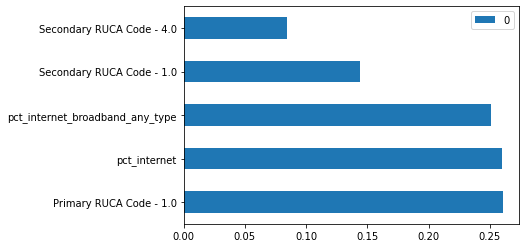

In [46]:
highest_importance_feature_importance.head(8).plot.barh()

#### Covariates

In [12]:
covariates = ['pct_hisp_latino', 
              'ruca_metro', 
              'ruca_micro', 
              'ruca_small_town', 
              'ruca_rural', 
              'pct_pop_foreign_born', 
              'pct_pop_disability']


In [23]:
covariates_feature_importance = XGBoost_with_tuning(covariates)

explained_variance:  0.2786
r2:  0.2784
MAE:  6.6696
MSE:  86.4495
RMSE:  9.2978


#### Covariates, key vars, and highest importance vars

In [13]:
set1 = list(set(covariates + key_vars_1 + highest_imporance_vars))

In [48]:
combinations_feature_importance = XGBoost_with_tuning(set1)

explained_variance:  0.5722
r2:  0.5721
MAE:  5.0841
MSE:  51.2644
RMSE:  7.1599


<AxesSubplot:>

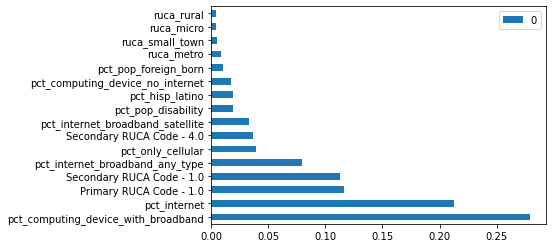

In [49]:
combinations_feature_importance.plot.barh()

#### Highest feature importance variables and highest broadband feature importance variables

In [14]:
highest_broadband_feature_importance = ['pct_desktop_or_laptop', 
                                        'pct_tablet',
                                        'log_median_income_over_log_median_house',
                                        'pct_computing_device_no_internet', 
                                        'pct_internet_no_subscrp',
                                        'Crown_Castle_present', 
                                        'pct_computing_device_with_dialup']

In [15]:
highest_importance_vars = highest_broadband_feature_importance + highest_imporance_vars

In [17]:
highest_importance_vars_importances = XGBoost_with_tuning(highest_importance_vars)

explained_variance:  0.6254
r2:  0.6254
MAE:  4.8262
MSE:  44.8847
RMSE:  6.6996


In [18]:
highest_importance_vars_importances

,0
pct_desktop_or_laptop,0.255292
pct_tablet,0.144123
Primary RUCA Code - 1.0,0.131437
pct_internet,0.128849
Secondary RUCA Code - 1.0,0.101903
pct_internet_broadband_any_type,0.058120
pct_computing_device_no_internet,0.050473
log_median_income_over_log_median_house,0.043973
Secondary RUCA Code - 4.0,0.041874
pct_internet_no_subscrp,0.016022


#### Broadband set 1 + highest importance vars and highest broadband feature importance vars

In [21]:
high_importance_vars_and_key_vars_1 = list(set(highest_broadband_feature_importance + highest_imporance_vars + key_vars_1))

In [22]:
XGBoost_with_tuning(high_importance_vars_and_key_vars_1)

explained_variance:  0.6318
r2:  0.6317
MAE:  4.7823
MSE:  44.1191
RMSE:  6.6422


,0
pct_desktop_or_laptop,0.341342
pct_tablet,0.111373
Primary RUCA Code - 1.0,0.109222
Secondary RUCA Code - 1.0,0.082498
pct_computing_device_with_broadband,0.079644
pct_internet,0.055179
pct_computing_device_no_internet,0.048378
log_median_income_over_log_median_house,0.042379
Secondary RUCA Code - 4.0,0.033552
pct_internet_broadband_satellite,0.019478


#### Broadband set 2 + highest importance vars and highest broadband feature importance vars

In [23]:
high_importance_vars_and_key_vars_2 = list(set(highest_broadband_feature_importance + highest_imporance_vars + key_vars_2))



In [ ]:
XGBoost_with_tuning(high_importance_vars_and_key_vars_2)